In [25]:
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

df = pd.read_csv('DARWIN_cleaned.csv')  # Load data

In [26]:
# Data splitting (80/20) and model training
X = df.drop(columns=['class', 'ID'])
y = df['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=42, 
                                                    stratify=y)
rf = RandomForestClassifier(n_estimators=100, 
                            random_state=42) 

rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [27]:
# Model Evaluation (Classification Report and Confusion Matrix)
y_pred = rf.predict(X_test)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))

Confusion Matrix:
 [[16  2]
 [ 2 15]]

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.89      0.89        18
           1       0.88      0.88      0.88        17

    accuracy                           0.89        35
   macro avg       0.89      0.89      0.89        35
weighted avg       0.89      0.89      0.89        35


Accuracy Score: 0.8857142857142857


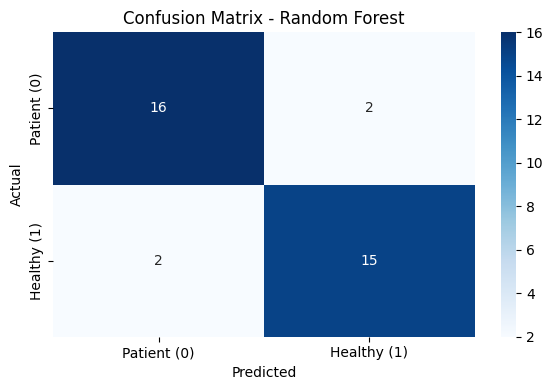

In [28]:
# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Patient (0)', 'Healthy (1)'],
            yticklabels=['Patient (0)', 'Healthy (1)'])

plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

Top 10 Important Features:
total_time23      0.069508
air_time23        0.045454
total_time15      0.027914
paper_time23      0.017625
pressure_mean5    0.017231
total_time22      0.016145
air_time5         0.015116
air_time15        0.014493
total_time17      0.013890
total_time3       0.013338
dtype: float64


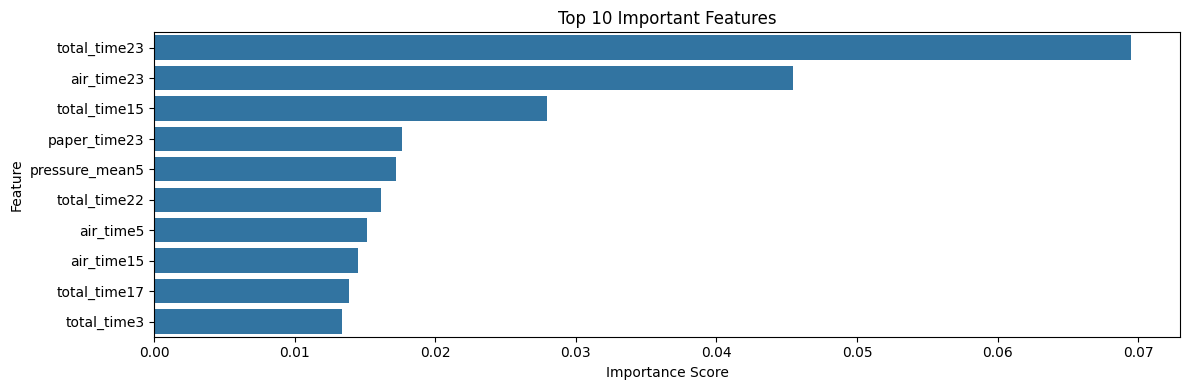

In [29]:
# Feature Importance
feature_importances = pd.Series(rf.feature_importances_, index=X.columns)
top_features = feature_importances.sort_values(ascending=False).head(10)

print("Top 10 Important Features:")
print(top_features)

plt.figure(figsize=(12, 4))
sns.barplot(x=top_features.values, y=top_features.index)
plt.title("Top 10 Important Features")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()